<a href="https://colab.research.google.com/github/Ranjitkumarmuduli/Classification-Capstone-Project./blob/main/Supervised_ML_Classification_colab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML classification capstone project by- Ranjit kumar muduli.

# Objective.

The goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD) from the given dataset.

# Dataset Description 
**Demographic:**

   • Sex: male or female("M" or "F")

   • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral:**

   • is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

   • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history):**

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current):**

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous) Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
**DV**

# Importing datasets 

In [ ]:
#Importing some important libraries.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Importing future warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Dataset path
path='/content/drive/MyDrive/ Supervised ML capstone project/data_cardiovascular_risk.csv'

In [ ]:
#Reading csv files
df=pd.read_csv(path)

In [ ]:
#Display the dataset
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


# EDA

In [ ]:
#First five rows of the dataset
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
#Last five rows of the dataset
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
#Looking for the shape of the dataset
df.shape

(3390, 17)

In [ ]:
#Lookng for the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

Need to check missing values first.

In [ ]:
#Let's count how many missing values we have
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

We see that there is some missing values present in the columns-education,cigsPerDay,BPMeds,totChol,BMI,heartRate,glucose.

In [ ]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


It showing that there is no duplicate values in our dataset.

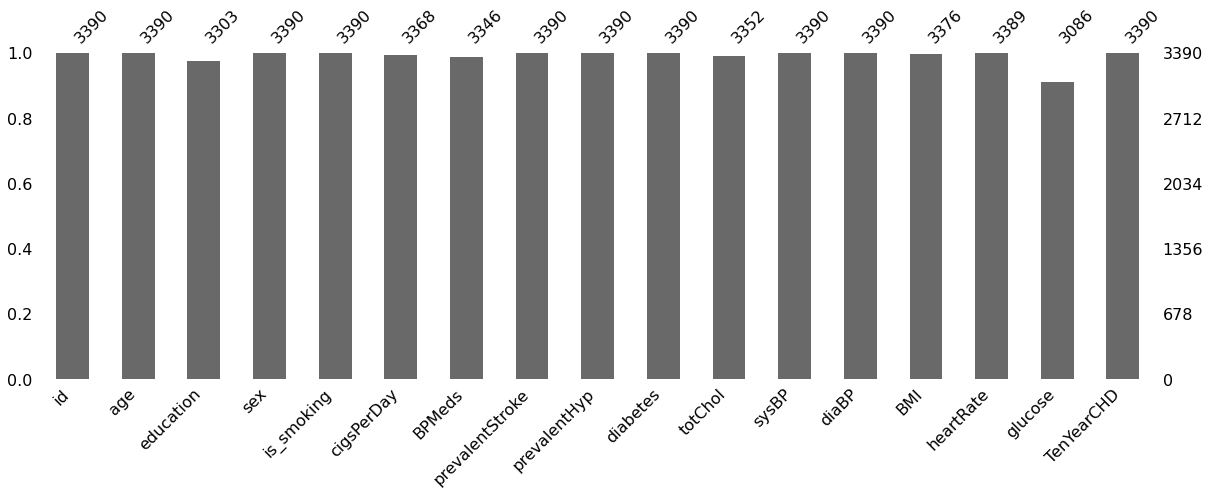

In [ ]:
#Visualize missing data

import missingno as mn #this library shows the null values in a graph
mn.bar(df,figsize = (20,6))

In [ ]:
# Let us check the majority and minority set of the target variable
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

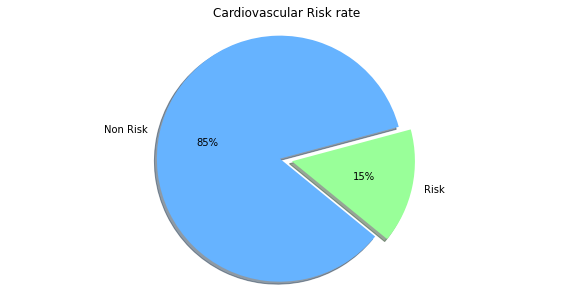

In [ ]:
# Let us plot the majority and minority set of the target variable
labels = 'Non Risk',"Risk"
my_colors = ['#66b3ff','#99ff99']
my_explode = (0,0.1)
plt.figure(figsize=(10,5))
plt.pie(df['TenYearCHD'].value_counts(), labels=labels ,autopct='%1.0f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode )
plt.title("Cardiovascular Risk rate")
plt.axis('equal')
plt.show()

**85% people - Majority Class - Non Risk**

**15% people - Minority Class - Risk**

# Data Cleaning.

**Handling NAN values**

In [ ]:
# Let us drop the ID column as it is unique and not of much use for this analysis.
df.drop('id',axis=1,inplace=True)

In [ ]:
# Let us check the new shape
df.shape

(3390, 16)

In [ ]:
# Total NaN values
(df.isnull().sum()).sum()

510

In [ ]:
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# Let us check if any of the NaN values belong to the minority class
print(f'Education:total NaN value is = {df.education.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.education.isnull())].shape}')
print(f'cigsPerDay:total NaN value is = {df.cigsPerDay.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.cigsPerDay.isnull())].shape}')
print(f'BPMeds:total NaN value is = {df.BPMeds.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.BPMeds.isnull())].shape}')
print(f'totChol:total NaN value is = {df.totChol.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.totChol.isnull())].shape}')
print(f'BMI:total NaN value is = {df.BMI.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.BMI.isnull())].shape}')
print(f'heartRate:total NaN value is = {df.heartRate.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.heartRate.isnull())].shape}')
print(f'glucose:total NaN value is = {df.glucose.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.glucose.isnull())].shape}')

Education:total NaN value is = 87, MinorityNaN count = (13, 16)
cigsPerDay:total NaN value is = 22, MinorityNaN count = (1, 16)
BPMeds:total NaN value is = 44, MinorityNaN count = (7, 16)
totChol:total NaN value is = 38, MinorityNaN count = (7, 16)
BMI:total NaN value is = 14, MinorityNaN count = (7, 16)
heartRate:total NaN value is = 1, MinorityNaN count = (1, 16)
glucose:total NaN value is = 304, MinorityNaN count = (39, 16)


Simplest way to infer the above data is as below#

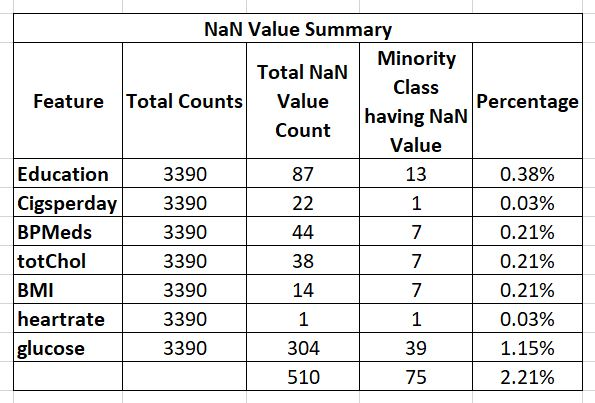

**Dropping the NaN values will lead to 2.21% loss of the minority set, which is already at 15%. Let us impute values to these, so that we don't loose the minority class data.**

In [ ]:
# filling the null values with median and mode for numeric and categorical columns respectively
df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['BPMeds'].fillna(df['BPMeds'].mode()[0],inplace = True)
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [ ]:
#Now cheching the null values in our dataset
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**No null values in our dataset.**

In [ ]:
# One Hot Encoding 

df['sex']= df['sex'].apply(lambda x: 1 if x=='M' else 0)
df['is_smoking']= df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [ ]:
# creating a list that contains all the numerical features
numerical_columns  = [i for i in df.columns if len(df[i].unique())>25]
print(list(numerical_columns))

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [ ]:
# creating a list that contains all the categorical features
categorical_columns = [i for i in df.columns if len(df[i].unique())<10]

categorical_columns.remove('TenYearCHD') # dropping the target variable i.e. TenYearCHD
print(list(categorical_columns))

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


**Over view outlier**

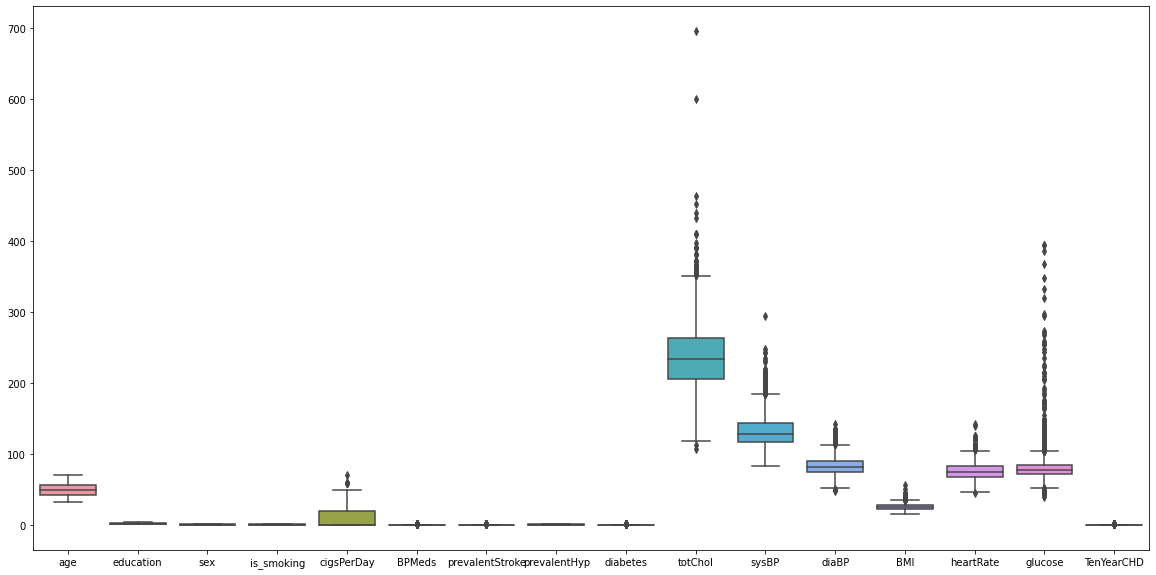

In [ ]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

* Outliers can be seen in both the categorical and numerical columns

* outliers are present in totChol, cigsPerDay, diaBP,sysBP,hearRate,glucose.
Glucose feature has highest number of outliers.

* Outliers are important here and we simply cannot remove them because there could be a possibility that a person might have a high risk and removing it, would lead to ignorance of the same.

* This would further affect the machine learning model.

# Performing Eda on the Dataset.

In [ ]:
# looking at the unique values of each column in categorical columns
for feature in categorical_columns:
    print(feature,':')
    print(df[feature].value_counts())
    print("----------------")

education :
1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
----------------
sex :
0    1923
1    1467
Name: sex, dtype: int64
----------------
is_smoking :
0    1703
1    1687
Name: is_smoking, dtype: int64
----------------
BPMeds :
0.0    3290
1.0     100
Name: BPMeds, dtype: int64
----------------
prevalentStroke :
0    3368
1      22
Name: prevalentStroke, dtype: int64
----------------
prevalentHyp :
0    2321
1    1069
Name: prevalentHyp, dtype: int64
----------------
diabetes :
0    3303
1      87
Name: diabetes, dtype: int64
----------------


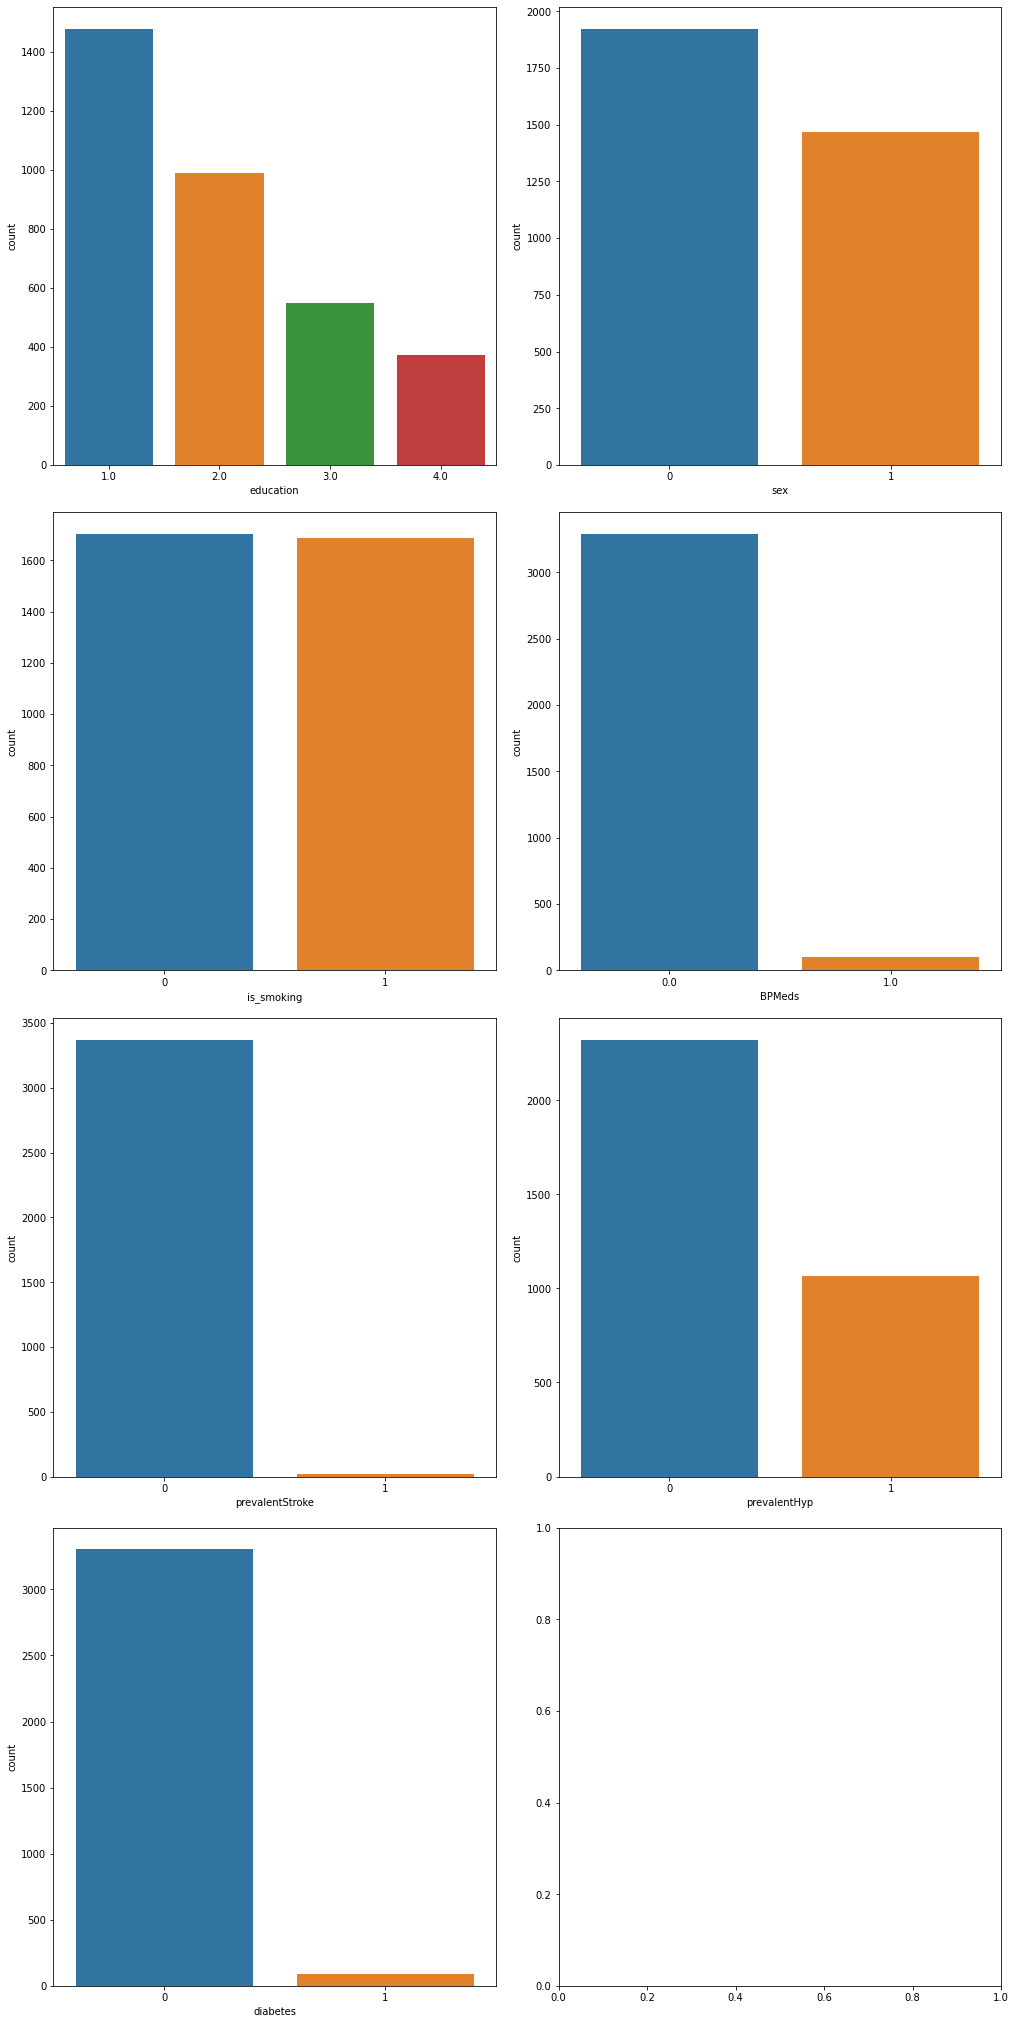

In [ ]:
#plotting countplot for categorical columns
num_plots = len(categorical_columns)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_columns):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=df, ax=axs[row][pos])

**Number of people who were not on BPmeds, who did not had a stroke in past, and who are dont have diastolic blood pressure are very less.**

# EDA - Feature Analysis on Continuous Features

<Figure size 720x432 with 0 Axes>

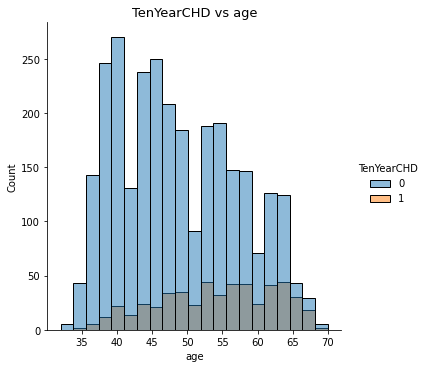

<Figure size 720x432 with 0 Axes>

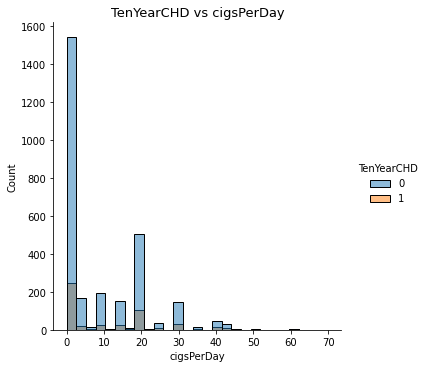

<Figure size 720x432 with 0 Axes>

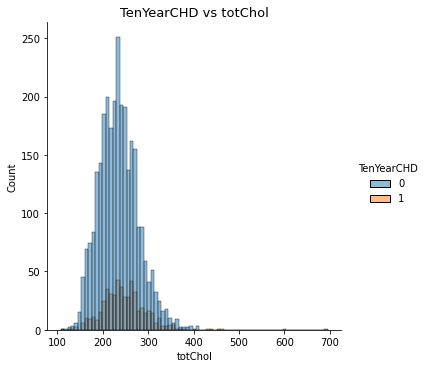

<Figure size 720x432 with 0 Axes>

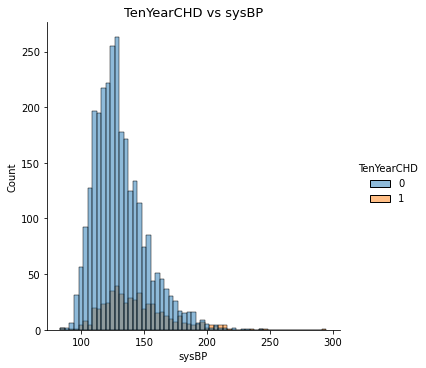

<Figure size 720x432 with 0 Axes>

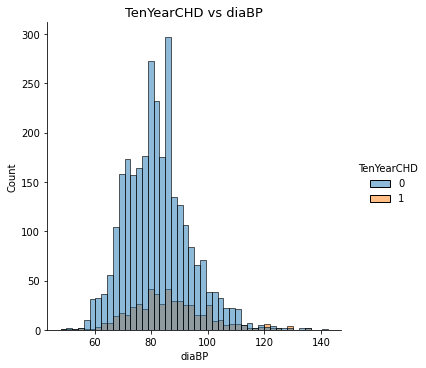

<Figure size 720x432 with 0 Axes>

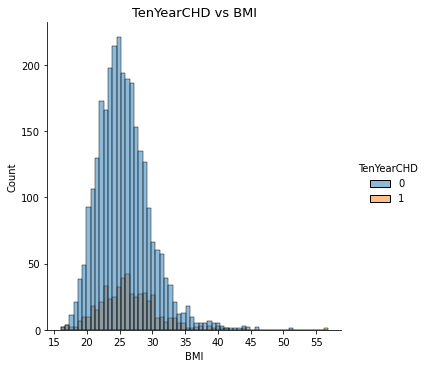

<Figure size 720x432 with 0 Axes>

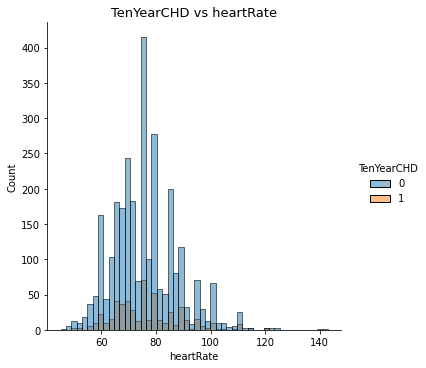

<Figure size 720x432 with 0 Axes>

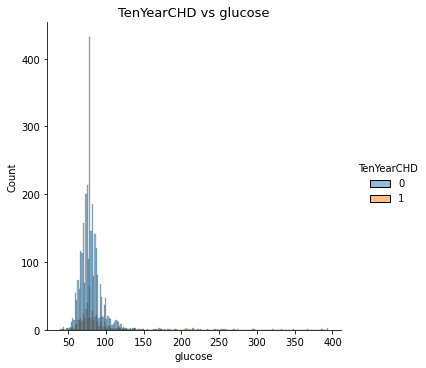

In [ ]:
for a, b in enumerate(numerical_columns ):
  plt.figure(figsize = (10,6))
  sns.displot(df, x=b, hue="TenYearCHD")
  plt.title(f'TenYearCHD vs {b}', fontsize=13)
  plt.show()

* Glucose and totalChol are higly right skewed.
* cigsPerDay, sysBP and BMI are moderately right skewed.
* Ages, diaBP and heartRate are somewhat normally distributed.

# EDA - Feature Analysis on Discrete Features

<Figure size 720x432 with 0 Axes>

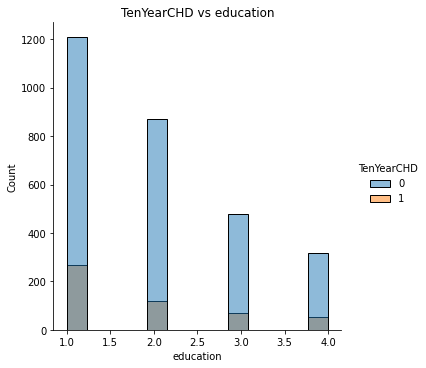

<Figure size 720x432 with 0 Axes>

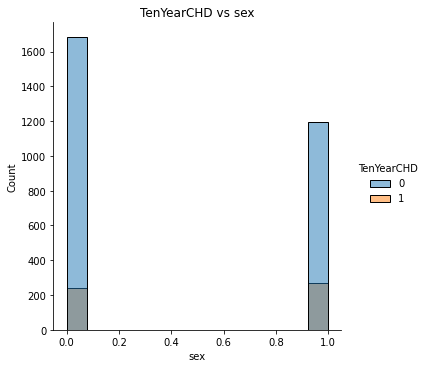

<Figure size 720x432 with 0 Axes>

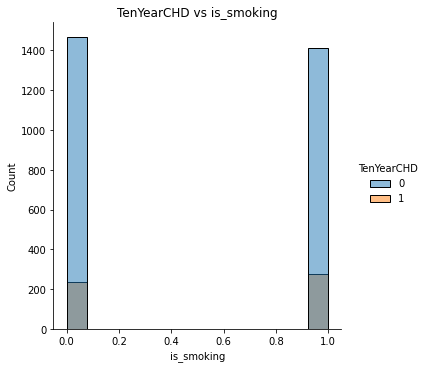

<Figure size 720x432 with 0 Axes>

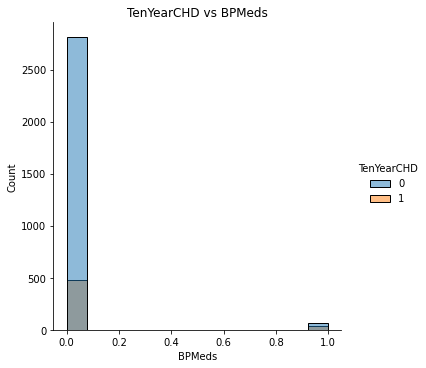

<Figure size 720x432 with 0 Axes>

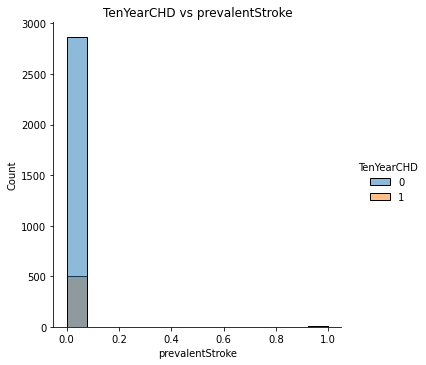

<Figure size 720x432 with 0 Axes>

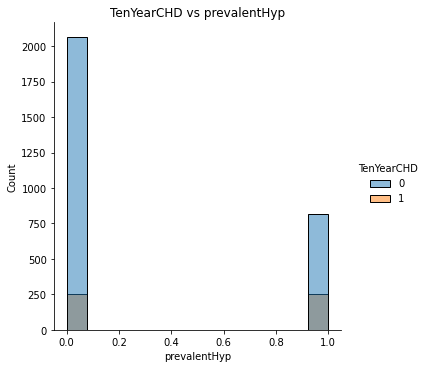

<Figure size 720x432 with 0 Axes>

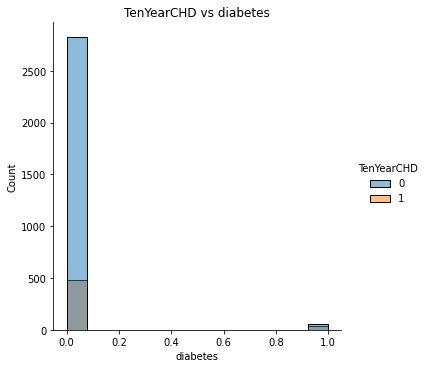

In [ ]:
# Dependent variable vs categorical features
for a, b in enumerate(categorical_columns):
  plt.figure(figsize = (10,6))
  sns.displot(df, x=b, hue="TenYearCHD")
  plt.title(f'TenYearCHD vs {b}')
  plt.show()

* Education is important, as it is evident that if people are aware, they take care and precautions in order to avoid the risk of CHD.
* BPMeds, Prevalentstroke, diabetes have very low variance, thus we are unable to come up with any generalized conclusion about the co-relation between their history and prevalence of cardiovascular risk.

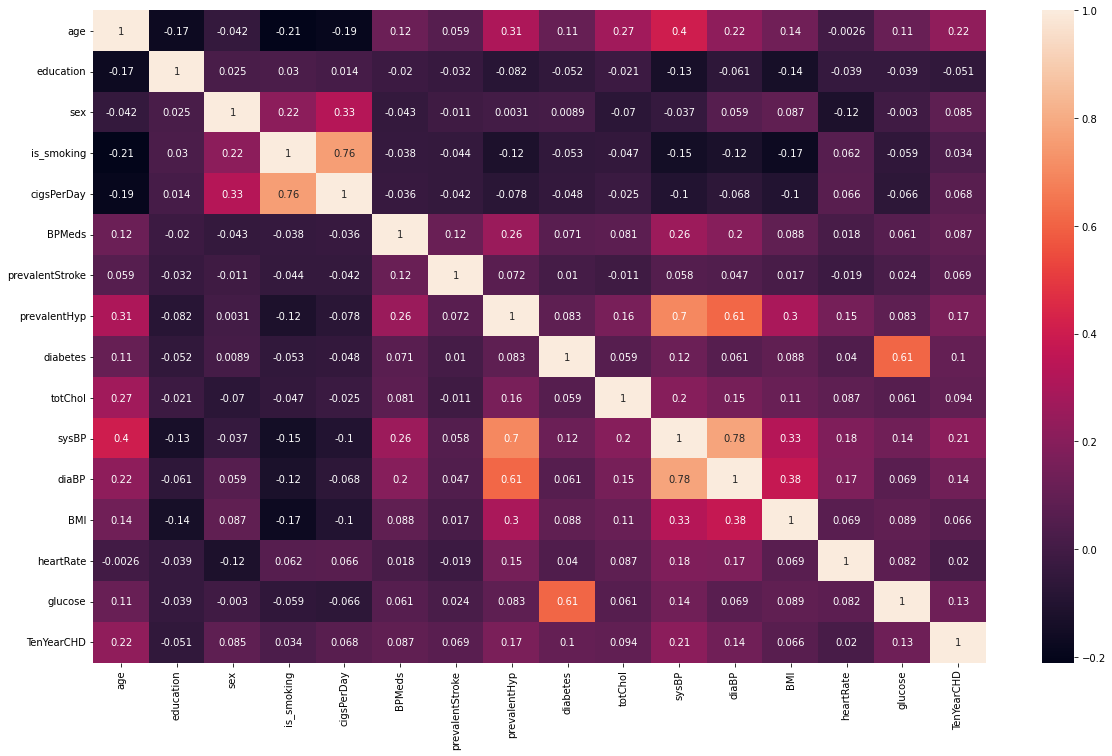

In [ ]:
# lookings at the relationship of features with one another
plt.figure(figsize=(20,12))
sns.heatmap(data = df.corr(),annot= True)

* sysBP and diaBP show the strongest positive correlation of 0.78 with each other.
* is_smoking and cigsPerDay has positive correlation of 0.76.
* Correlation of diabetes with glucose and prevalentHyp with diaBP is equal i.e. positive correlation of 0.61.

# For a healthy human, the BP is 120/80.
Let us derive a new feature i.e. avgBP which would be defined by the below formula

**avgBP = (sysBP + diaBP)/2**

In [ ]:
df["avgBP"]= round((df["sysBP"]+df["diaBP"])/2,2)

In [ ]:
df.head(3)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,avgBP
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,116.5
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,133.0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,93.5


We checked that avgBP has to be added to our data set, so we need to remove "sysBP" and "diaBP".

In [ ]:
#Droping sysBP
df.drop('sysBP',axis=1,inplace=True)

In [ ]:
#Droping diaBP
df.drop('diaBP',axis=1,inplace=True)

# Bivariate analysis.

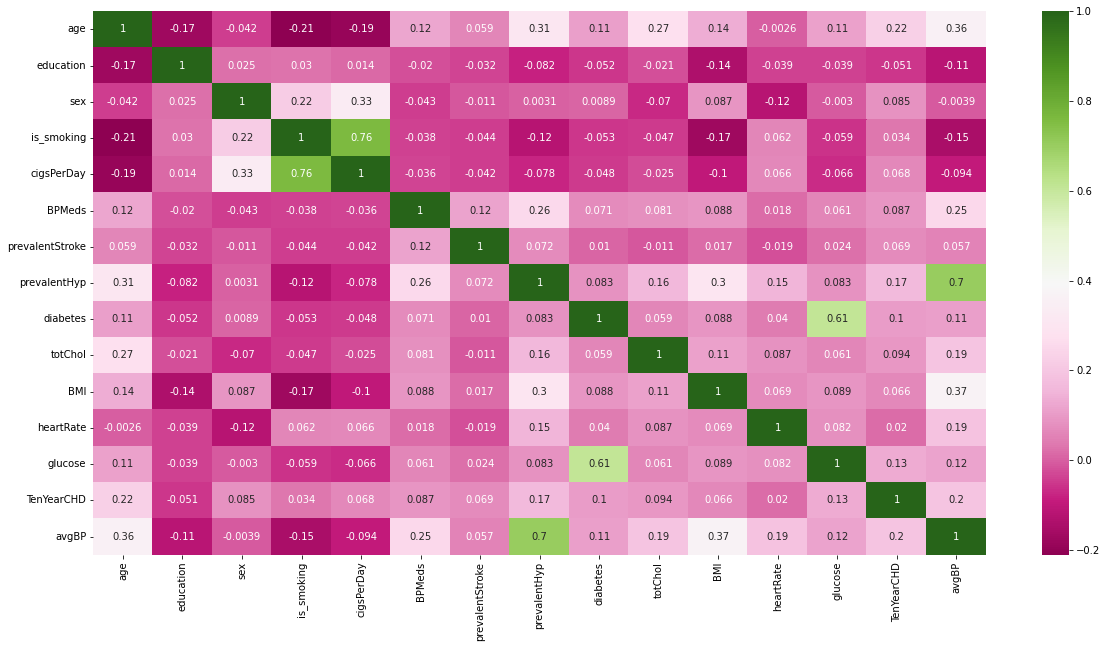

In [ ]:
#Bivariate Analysis: Corelation Matrix
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='PiYG')

# EDA on Features

#Age & Sex v/s Risk

In [ ]:
#unique value in sex column.
df['sex'].unique()

array([0, 1])

In [ ]:
at_risk = "At risk"
no_risk= "No risk"

Text(0.5, 1.0, 'Male')

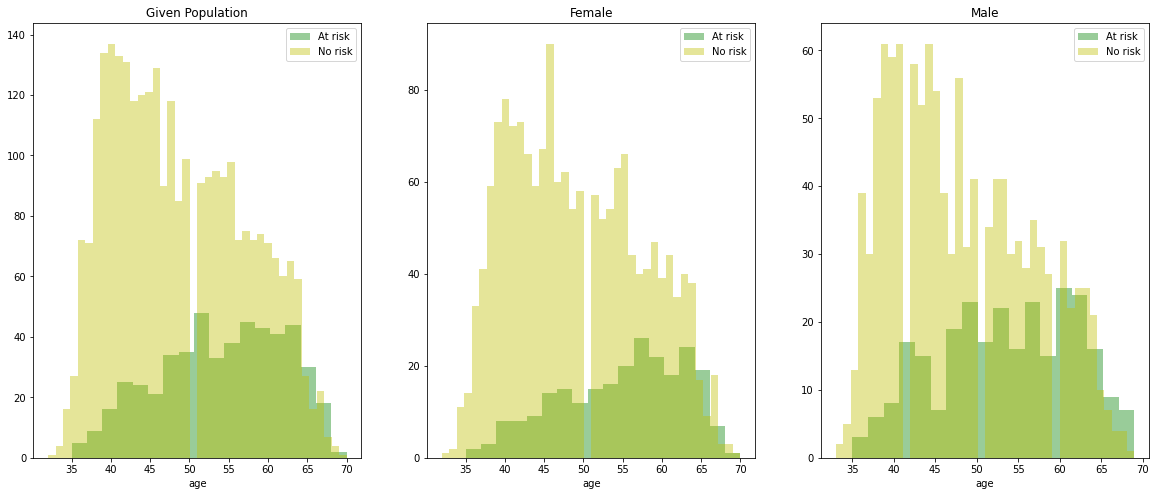

In [ ]:
fig , axes= plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax= sns.distplot(df[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='g',kde=False)
ax= sns.distplot(df[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='y',kde=False)
ax.legend()
ax.set_title("Given Population")
women= df[df['sex']==0]
men= df[df['sex']==1]
ax= sns.distplot(women[women['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='g',kde=False)
ax= sns.distplot(women[women['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='y',kde=False)
ax.legend()
ax.set_title("Female")
ax= sns.distplot(men[men['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[2],color='g',kde=False)
ax= sns.distplot(men[men['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[2],color='y',kde=False)
ax.legend()
ax.set_title("Male")

* Both women and men lying in Age group of 50 and above have high risk of heart disease.
* Men above 45 years are usually at risk, where as women above 55 years are usually at risk.
* Men are more likely to have heart disease compared to women.

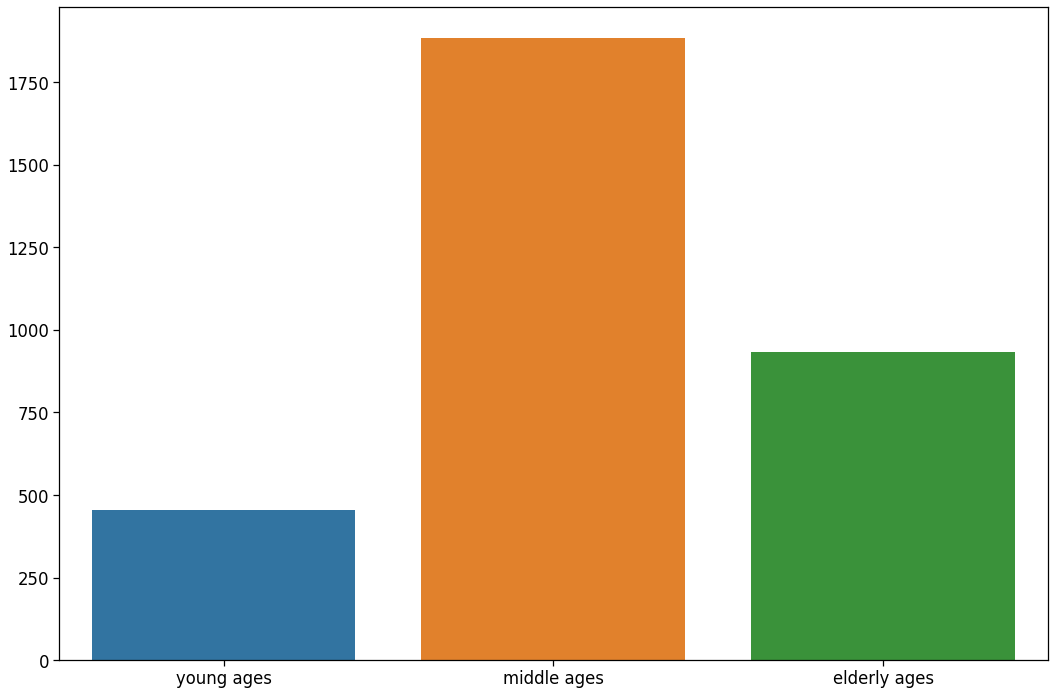

In [ ]:
#dividing the age into three section
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]

plt.figure(figsize=(15,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

Count of Middle age person are highest followed by elderly person.

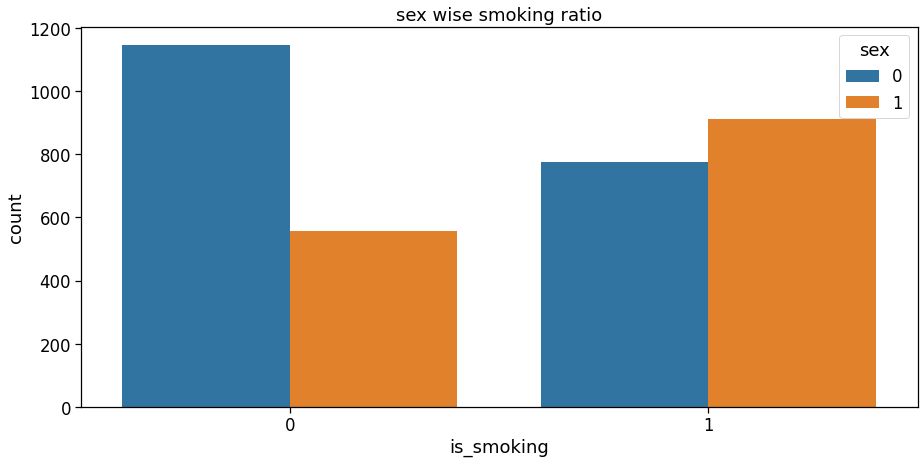

In [ ]:
# number of male and female smokers
plt.figure(figsize=(15,7))
sns.countplot(x='is_smoking', hue = 'sex', data=df)
plt.title('sex wise smoking ratio')

plt.show()

* Number of male smoker is higher than female smoker.

* Though the number of female is less than that of men, the total number of female who doesn’t smoke is twice that of men.

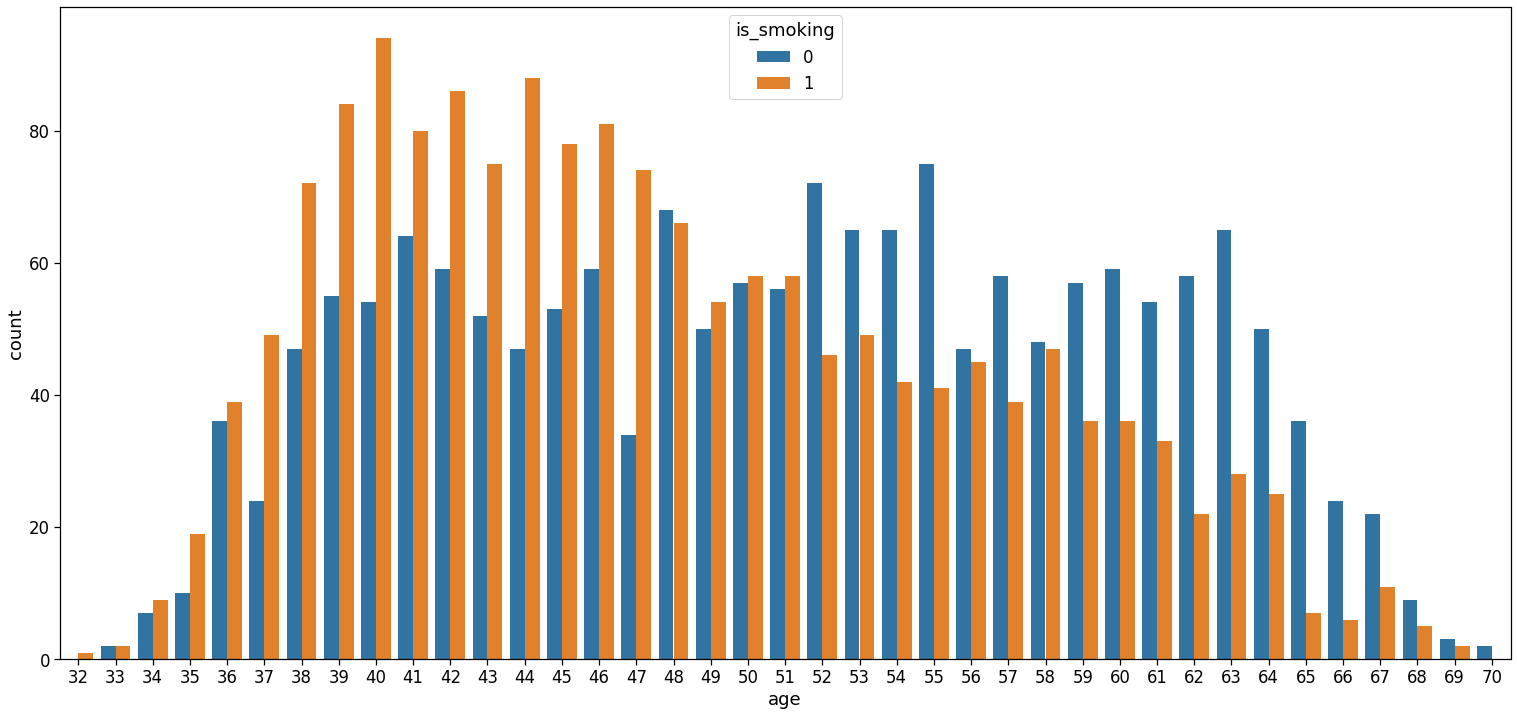

In [ ]:
#age wise smoking ratio
plt.figure(figsize=(26,12), facecolor='w')
sns.countplot(x="age",data=df,hue="is_smoking")

Number of smokers between the age group of 35 to 50 are highest i.e. Young and middle aged people smokes most.

# Age & Smoking v/s Risk

Text(0.5, 1.0, 'NonSmokers')

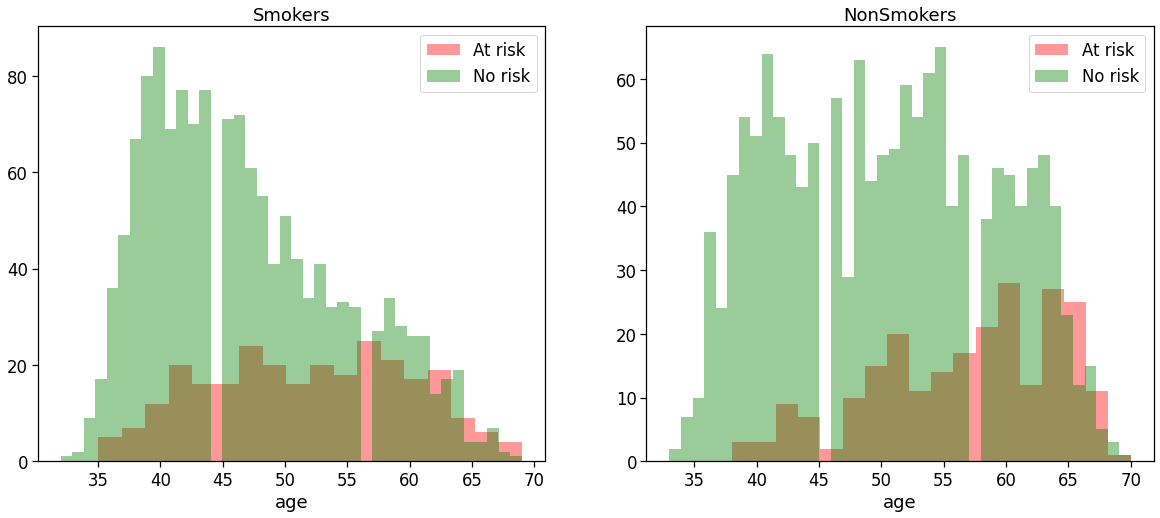

In [ ]:
smoking= df[df['is_smoking']==1]
non_smoking= df[df['is_smoking']==0]
fig , axes= plt.subplots(nrows=1,ncols=2,figsize=(20,8))
ax= sns.distplot(smoking[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='r',kde=False)
ax= sns.distplot(smoking[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='g',kde=False)
ax.legend()
ax.set_title("Smokers")

ax= sns.distplot(non_smoking[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(non_smoking[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='g',kde=False)
ax.legend()
ax.set_title("NonSmokers")

Age clearly plays an important role irrespetive of smoking or not, which is clearly evident from the above two plots.

#CigsPerDay & Sex v/s Risk

In [ ]:
#Unique values in is_smoking column
df['is_smoking'].unique()

array([1, 0])

In [ ]:
df['cigsPerDay']=df['cigsPerDay'].astype(int)

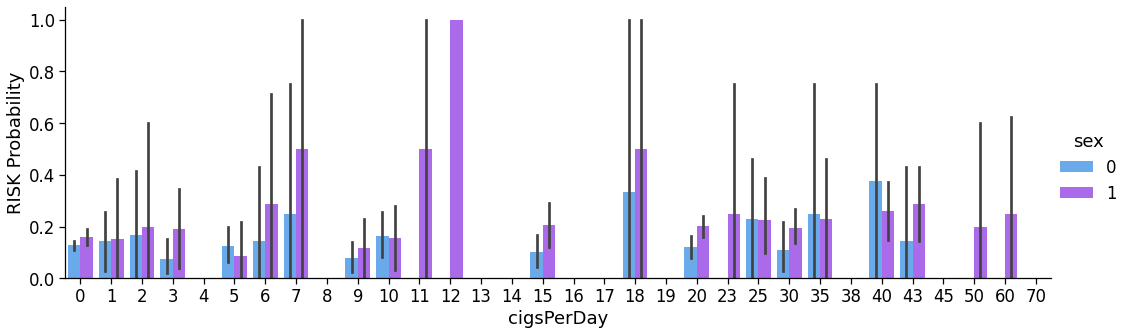

In [ ]:
g=sns.factorplot('cigsPerDay','TenYearCHD',kind='bar',
                    data=df,hue='sex',aspect=3, palette="cool")
g=g.set_ylabels("RISK Probability")

* It is very difficult to say, if consumption of less or no cigarettes mean lower risk levels.

* Male have more tendency of developing risk than females, since smoking levels of male is higher than that of female smokers.

**Which gender is prone to coronary heart disease?**

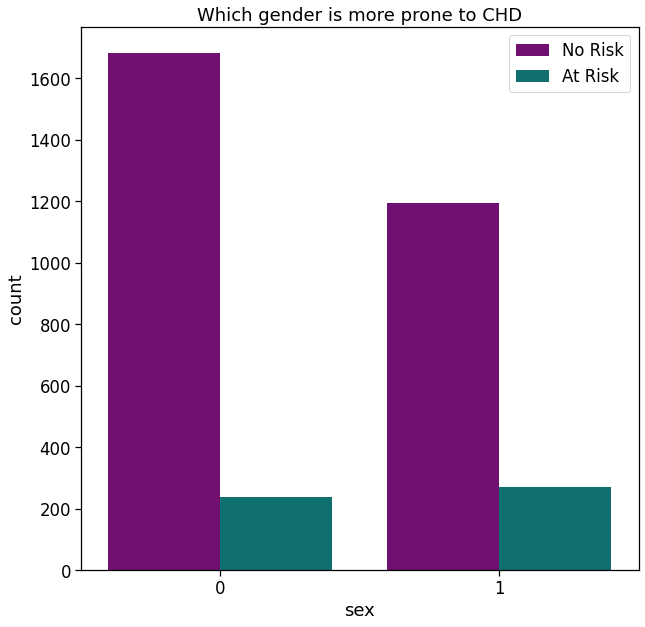

In [ ]:
my_palette = {0 : 'purple' , 1 : 'teal'}

plt.figure(figsize = (10,10))
sns.countplot(x = df['sex'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

* The number of males and females which are at risk of CHD is equal.

* The number of females who are not at risk is higher than that of male.

**Are diabetic patients at more risk of coronary heart disease ?**

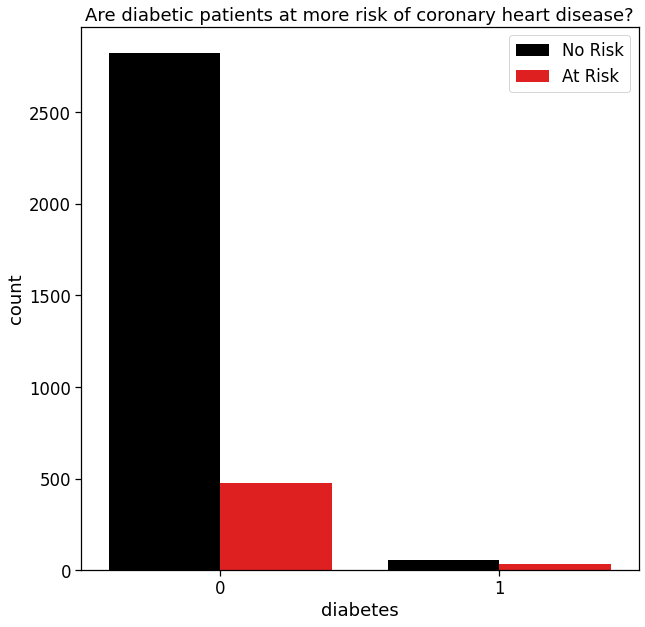

In [ ]:
# diabetes and heart disease relation
my_palette = {0 : 'black' , 1 : 'red'}
plt.figure(figsize = (10,10))
sns.countplot(x = df['diabetes'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])
plt.show()

Diabetic patients are at more risk of CHD.

**Are hypertensive patients at more risk of coronary heart disease ?**

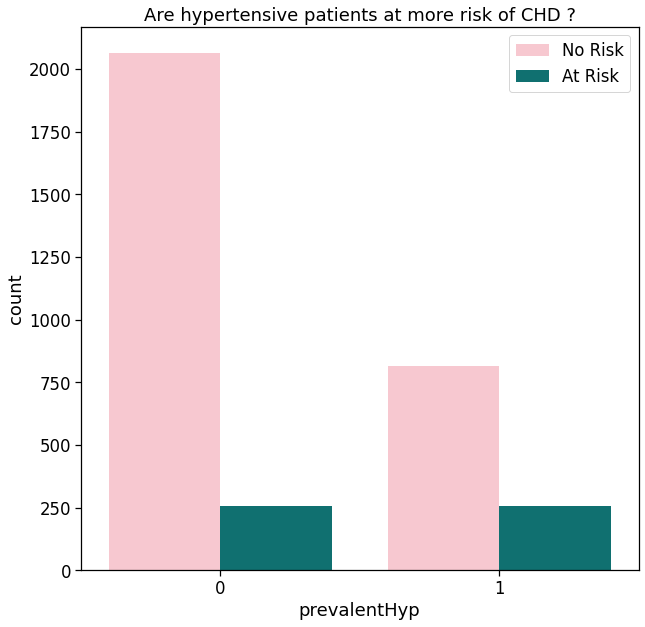

In [ ]:
plt.figure(figsize = (10,10))
my_palette = {0 : 'pink' , 1 : 'teal'}
sns.countplot(x = df['prevalentHyp'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are hypertensive patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

* Out of all the people who are not Hypertensive, the number of people getting CHD is very less.
* People who are hypertensive has more chances of getting CHD.

**Are patients with blood pressure on medication at more risk of coronary heart disease ?**

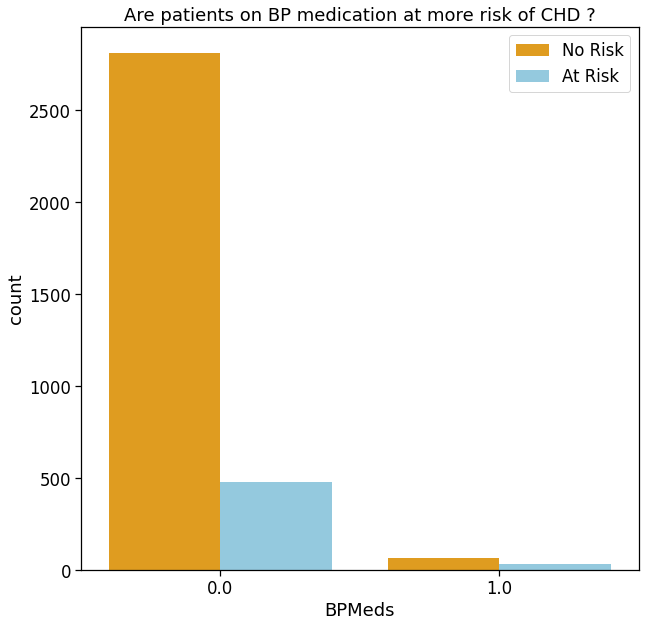

In [ ]:
my_palette = {0 : 'orange' , 1 : 'skyblue'}
plt.figure(figsize = (10,10))
sns.countplot(x = df['BPMeds'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are patients on BP medication at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

* Patients on BP medication are more prone to CHD where as those who are not on BP medication has severely less chances of getting CHD.

**Whether a person who had a stroke earlier more prone to CHD?**

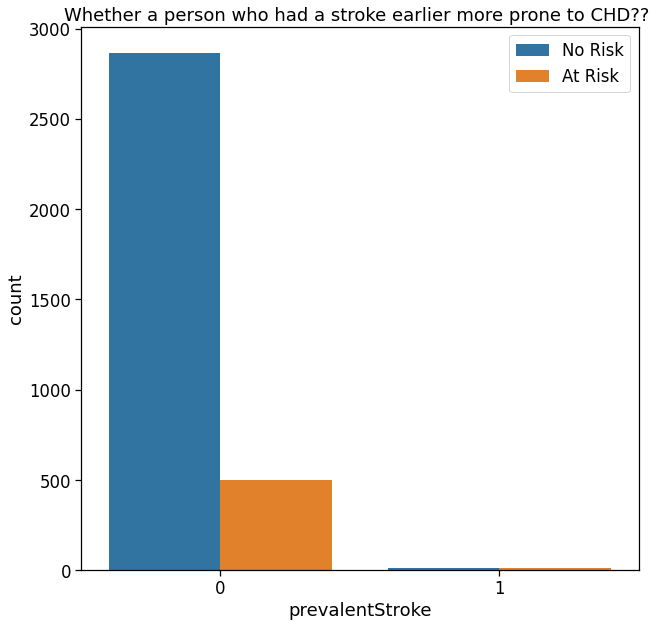

In [ ]:
plt.figure(figsize = (10,10))
# my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['prevalentStroke'], hue = df['TenYearCHD'])
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

The person who previously had a heart stroke are more at risk to CHD than those who did not.

# Data Splitting, Training & Modelling

In [ ]:
# Let us make a copy
new_df = df.copy()

In [ ]:
# Let us now split
X = new_df.drop(['TenYearCHD'], axis=1)
y = new_df['TenYearCHD']

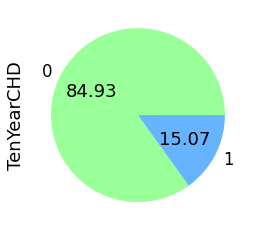

In [ ]:
# Show pie plot 
y.value_counts().plot.pie(autopct='%.2f',colors = ['#99ff99','#66b3ff'])

As per the above plot our target feature i.e., TenYearCHD, the risk rate is relatively rare, only 15% of the people have this disease.

Hence even if our model gives 94% accuracy! It is misleading.

All those non-risk cases, we’d have 100% accuracy. Those cases in which a person has a risk, we’d have 0% accuracy.

Hence our Evaluation Metrics for class imbalance problems (especiallly health data) would be RECALL, ROC SCORE.

# Handling Imbalance Data

In [ ]:
#Using SMOTE for oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape :', len(new_df))
print('Resampled dataset shape :', len(y_smote))

Original dataset shape : 3390
Resampled dataset shape : 5758


In [ ]:
X_resampled= pd.DataFrame(x_smote)
y_resampled= pd.DataFrame(y_smote)

In [ ]:
y_resampled.value_counts()

TenYearCHD
0             2879
1             2879
dtype: int64

**Now our Data is balanced.**

# Standardizing the Dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X_resampled)

In [ ]:
X = pd.DataFrame(X,columns= (new_df.drop(['TenYearCHD'], axis=1).columns))

## **Data Modelling & Training**

We use the following different machine learning models for the dataset:

1. Logistic Regression

2. Decision Tree Classifier

3. K-Nearest Neighbour Classifier

4. Random Forest Classifier

5. Support Vector Machine

6. XGboost Classifier

In [ ]:
# Importing all the essesntial Libraries.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_resampled , test_size=0.3,stratify = y_resampled, random_state=0)

# Logistic Regression